<h2>Reflections</h2>

[Watch Lecture](https://youtu.be/nzj7kw1Ycms)

_We use certain tools from python library "<b>matplotlib.pyplot</b>" for drawing. Check the notebook [Python: Drawing](../python/Python06_Drawing.ipynb) for the list of these tools._

We start with a very basic reflection.

<h3> Z-gate (operator) </h3>

The indentity operator $ I = \mymatrix{cc}{1 & 0 \\ 0 & 1} $ does not affect the computation.

What about the following operator?

$ Z = \Z $.

It is very similar to the identity operator.

Consider the quantum state $ \ket{u} = \myvector{ \frac{3}{5} \\ \frac{4}{5} }  $.

We calculate the new quantum state after applying $ Z $ to $ \ket{u} $:

$ \ket{u'} = Z \ket{u} =  \Z  \myvector{ \frac{3}{5} \\ \frac{4}{5} } =  \myrvector{ \frac{3}{5} \\ -\frac{4}{5} } $.

We draw both states below.

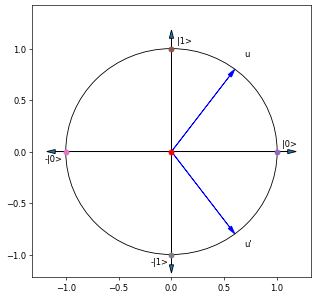

In [7]:
%run qlatvia.py

draw_qubit()

draw_quantum_state(3/5,4/5,"u")

draw_quantum_state(3/5,-4/5,"u'")

When we apply $ Z $ to the state $ \ket{u'} $, we obtain the state $\ket{u}$ again: $  \Z \myrvector{ \frac{3}{5} \\ -\frac{4}{5} } =  \myvector{ \frac{3}{5} \\ \frac{4}{5} }  $.

It is easy to see that the operator $Z$ is a reflection and its **line of reflection** is the $x$-axis.

Remark that applying the same reflection twice on the unit circle does not make any change.

<h3> Task 1 </h3>

Create a quantum circuit with 5 qubits.

Apply h-gate (Hadamard operator) to each qubit.

Apply z-gate ($Z$ operator) to randomly picked qubits. (i.e., $ mycircuit.z(qreg[i]) $)

Apply h-gate to each qubit.

Measure each qubit.

Execute your program 1000 times.

Compare the outcomes of the qubits affected by z-gates and the outcomes of the qubits not affected by z-gates.

Does z-gate change the outcome?

Why?

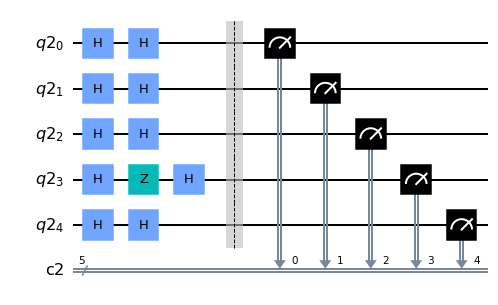

In [8]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

#
# your code is here
#
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

number_of_qubit = 5

# define a quantum register with 5 qubits
q =  QuantumRegister(number_of_qubit)

# define a classical register with 5 bits
c = ClassicalRegister(number_of_qubit)

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply h-gate to all qubits
for i in range(number_of_qubit):
    qc.h(q[i])

# apply z-gate to randomly picked qubits
for i in range(number_of_qubit):
    if randrange(2) == 0: # the qubit with index i is picked to apply z-gate
        qc.z(q[i])
        
# apply h-gate to all qubits
for i in range(number_of_qubit):
    qc.h(q[i])
    
qc.barrier()
    
# measure all qubits
qc.measure(q,c)

# draw the circuit
qc.draw(output='mpl')

In [9]:
# execute the circuit 1000 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)
print(counts)

{'01000': 1000}


<h3> Hadamard operator </h3>

Is Hadamard operator a reflection? If so, what is its line of reflection?

Remember the following transitions.

$ H \ket{0} = \hadamard \vzero = \stateplus = \ket{+} ~~~$ and $~~~ H \ket{+} = \hadamard \stateplus = \vzero = \ket{0} $.

$ H \ket{1} = \hadamard \vone = \stateminus = \ket{-} ~~~$ and $~~~ H \ket{-} = \hadamard \stateminus = \vone = \ket{1} $.

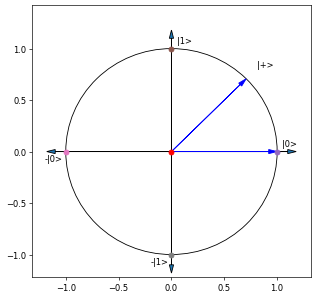

In [10]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

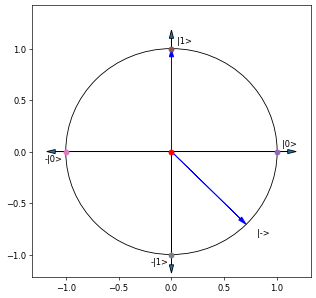

In [11]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(0,1,"")

draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

<h3> Hadamard - geometrical interpretation </h3>

Hadamard operator is a reflection and its line of reflection is represented below.

It is the line obtained by rotating $x$-axis with $ \frac{\pi}{8} $ radians in counter-clockwise direction.

Text(0.21, 0.16, 'π/8')

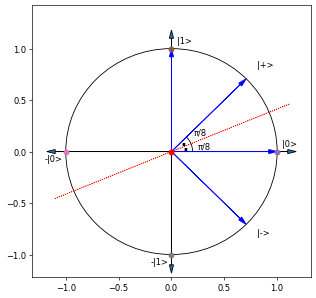

In [12]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")
draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

draw_quantum_state(0,1,"")
draw_quantum_state(1/sqrttwo,-1/sqrttwo,"|->")

# line of reflection for Hadamard
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=22.5) )
text(0.09,0.015,'.',fontsize=30)
text(0.25,0.03,'\u03C0/8')
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=22.5,theta2=45) )
text(0.075,0.065,'.',fontsize=30)
text(0.21,0.16,'\u03C0/8')

<h3> Task 2 </h3>

Randomly create a quantum state and multiply it with Hadamard matrix to find its reflection.

Draw both states.

Repeat the task for a few times.

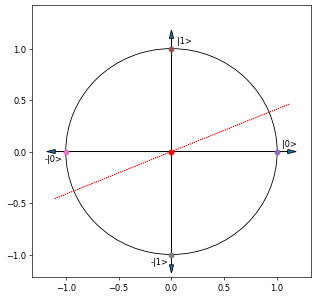

In [13]:
%run qlatvia.py

draw_qubit()

# line of reflection for Hadamard
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

#
# your code is here
#
# randomly create a 2-dimensional quantum state
from math import cos, sin, pi
from random import randrange
def random_quantum_state2():
    angle_degree = randrange(360)
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]

0.2419218955996679 0.9702957262759965
0.8571673007021123 -0.515038074910054


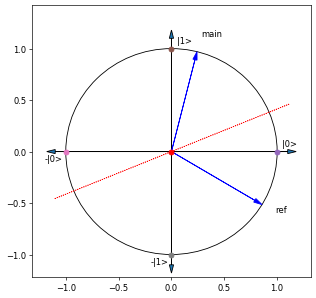

In [14]:
%run qlatvia.py

draw_qubit()

# line of reflection for Hadamard
from matplotlib.pyplot import arrow
arrow(-1.109,-0.459,2.218,0.918,linestyle='dotted',color='red')

[x1,y1] = random_quantum_state2()

print(x1,y1)

sqrttwo=2**0.5
oversqrttwo = 1/sqrttwo

[x2,y2] = [ oversqrttwo*x1 + oversqrttwo*y1 , oversqrttwo*x1 - oversqrttwo*y1 ]

print(x2,y2)

draw_quantum_state(x1,y1,"main")

draw_quantum_state(x2,y2,"ref")

<h3> Task 3 </h3>

Find the matrix representing the reflection over the line $y=x$.

_Hint: Think about the reflections of the points $ \myrvector{0 \\ 1} $, $ \myrvector{-1 \\ 0} $, and $ \myrvector{-\sqrttwo \\ \sqrttwo} $ over the line $y=x$._

Randomly create a quantum state and multiply it with this matrix to find its reflection over the line $y = x$.

Draw both states.

Repeat the task for a few times.

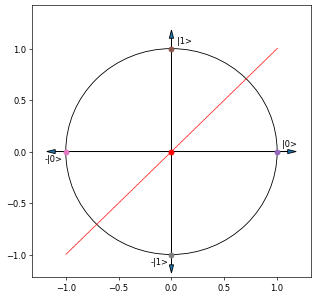

In [15]:
%run qlatvia.py

draw_qubit()

# the line y=x
from matplotlib.pyplot import arrow
arrow(-1,-1,2,2,linestyle='dotted',color='red')

#
# your code is here
#
# draw_quantum_state(x,y,"name")
# randomly create a 2-dimensional quantum state
from math import cos, sin, pi
from random import randrange
def random_quantum_state2():
    angle_degree = randrange(360)
    angle_radian = 2*pi*angle_degree/360
    return [cos(angle_radian),sin(angle_radian)]

Reflecting the randomly picked quantum state over the line $y=x$. 

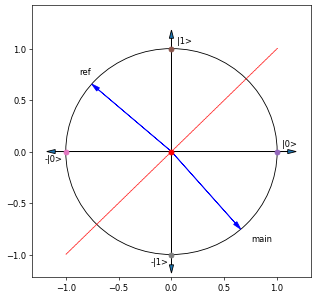

In [16]:
%run qlatvia.py

draw_qubit()

# the line y=x
from matplotlib.pyplot import arrow
arrow(-1,-1,2,2,linestyle='dotted',color='red')

[x1,y1] = random_quantum_state2()

[x2,y2] = [y1,x1]

draw_quantum_state(x1,y1,"main")
draw_quantum_state(x2,y2,"ref")

<h3>Reflection Operators</h3>

As we have observed, the following operators are reflections on the unit circle.

<b> Z operator:</b> $ Z = \mymatrix{rr}{ 1 & 0 \\ 0 & -1 } $. The line of reflection is $x$-axis.

<b> NOT operator:</b> $ X = \mymatrix{rr}{ 0 & 1 \\ 1 & 0 } $. The line of reflection is $y=x$.

<b> Hadamard operator:</b> $ H = \hadamard $. The line of reflection is $y= \frac{\sin(\pi/8)}{\cos(\pi/8)} x$. 

It is the line passing through the origin making an angle $ \pi/8 $ radians with $x$-axis.

<b>Arbitrary reflection operator:</b> Let $ \theta $ be the angle of the line of reflection. Then, the martix form of reflection is represented as follows:

$$ Ref(\theta) = \mymatrix{rr}{ \cos(2\theta) & \sin(2\theta) \\ \sin(2\theta) & -\cos(2\theta) } . $$

<h3> Task 4 (extra) </h3>

The matrix forms of rotations and reflections are similar to each other.

Represent $ Ref(\theta) $ as a combination of a basic reflection operator (i.e., $X$, $H$, or $Z$) and rotation $ R(\theta) $.

<h3> Task 5 (extra) </h3>

Randomly pick the angle $\theta$.

Draw the line of reflection with the unit circle.

Construct the corresponding reflection matrix.

Randomly create a quantum state and multiply it with this matrix to find its reflection.

Draw both states.

Repeat the task for a few times.

In [ ]:
%run qlatvia.py

draw_qubit()

#
# your code is here
#
# line of reflection 
# from matplotlib.pyplot import arrow
# arrow(x,y,dx,dy,linestyle='dotted',color='red')
#
#
# draw_quantum_state(x,y,"name")